In [31]:
import time
import pickle
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import matplotlib.colors as colors
from IPython.display import clear_output

In [32]:
def matrix_from_graph(G):
    max_x = max([G.nodes[node]['pos'][0] for node in G.nodes()])
    max_y = max([G.nodes[node]['pos'][1] for node in G.nodes()])

    matrix = np.zeros((max_x + 1, max_y + 1))
    
    for node in G.nodes():
        x, y = G.nodes[node]['pos']
        matrix[x][y] = G.nodes[node]['signal']

    return matrix

def graph_from_matrix(matrix):
    G = nx.Graph()
    for i in range(len(matrix)):
        for j in range(len(matrix[i])):
            G.add_node((i, j), pos=(i, j), signal=matrix[i][j], is_source=False)
    
    return G

def draw(G, type='graph'):
    # Drawing as a graph
    if type == 'graph':
        pos = nx.get_node_attributes(G, 'pos')
        node_colors = [G.nodes[node]['signal'] for node in G.nodes()]
        nx.draw(G, pos=pos, with_labels=True, node_color=node_colors, cmap=plt.cm.Reds, edgecolors='black', linewidths=1, vmin=0, vmax=1)
    
    # Drawing as a heatmap
    elif type == 'heatmap':
        matrix = matrix_from_graph(G)
        cmap = colors.LinearSegmentedColormap.from_list('custom', [(1, 1, 1), (0.7, 0, 0), (0.2, 0, 0)])
        plt.imshow(matrix, cmap=cmap, interpolation='nearest', vmin=0, vmax=1, extent=[0, 10, 10, 0])
        plt.colorbar()
    
    plt.show() 

In [33]:
G0 = nx.Graph()

G0.add_nodes_from([0, 1, 2, 3, 4, 5, 6, 7, 8])

G0.add_edges_from([(0, 1), (1, 2), (1, 4), (2, 5),
                  (3, 4), (3, 6), (4, 5), (5, 8),
                  (6, 7), (7, 8)])

pos = {0: (0, 0), 1: (1, 0), 2: (2, 0),
       3: (0, 1), 4: (1, 1), 5: (2, 1),
       6: (0, 2), 7: (1, 2), 8: (2, 2)}

# Atribute the position to each node
nx.set_node_attributes(G0, pos, 'pos')

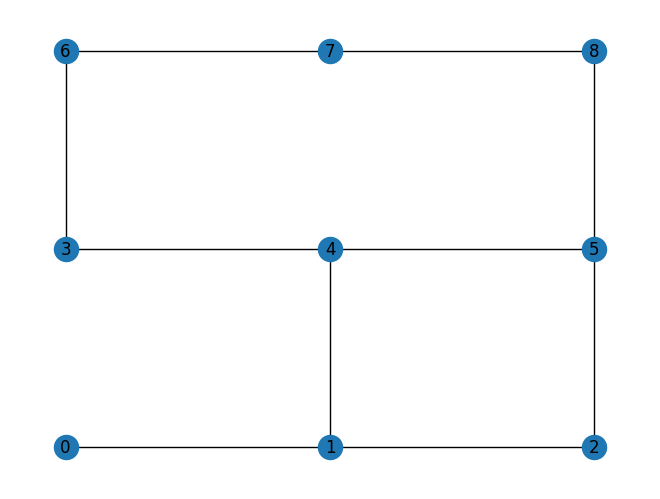

In [34]:
nx.draw(G0, pos=pos, with_labels=True)
plt.show()

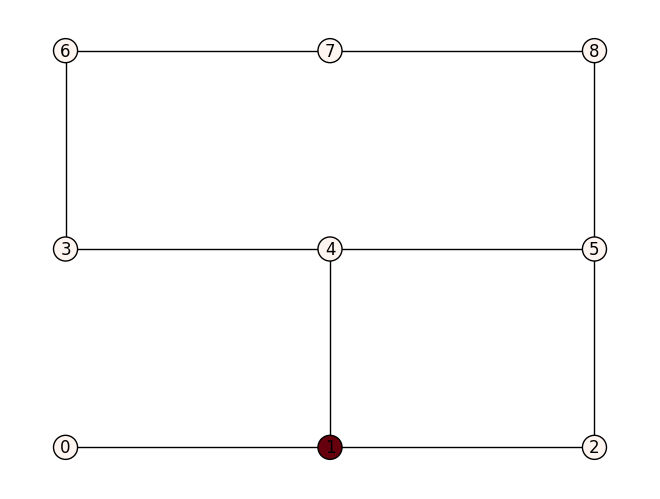

In [45]:
G = G0.copy()

for node in G.nodes():
    G.nodes[node]['signal'] = 0
    G.nodes[node]['is_source'] = False

G.nodes[1]['signal'] = 1.0
G.nodes[1]['is_source'] = True

draw(G)

0.8


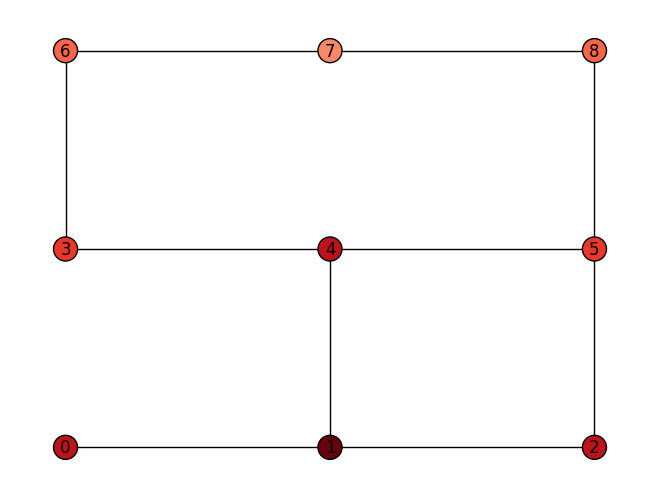

In [46]:
def all_nodes_signal_filled(G):
    print([G.nodes[n]['signal'] for n in G.nodes], end='                               \r')
    return all([G.nodes[n]['signal'] != 0.0 for n in G.nodes])

def simulate(G):
    higher_transmited_signal = 1.0
    while not all_nodes_signal_filled(G) and higher_transmited_signal > 0.1:
        higher_transmited_signal = 0.0
        G_new = G.copy()
        for node in G.nodes:
            if G.nodes[node]['signal'] != 0.0:
                continue            
            
            # Get 90% from the max signal of the neighbors
            max_signal = max([G.nodes[n]['signal'] for n in G.neighbors(node)]) * 0.8
            
            if max_signal > higher_transmited_signal:
                higher_transmited_signal = max_signal
            
            G_new.nodes[node]['signal'] = max_signal
        
        clear_output(wait=True)
        
        print(higher_transmited_signal)

        draw(G_new)

        time.sleep(1.0)

        G = G_new.copy()
    
    return G

G = simulate(G)

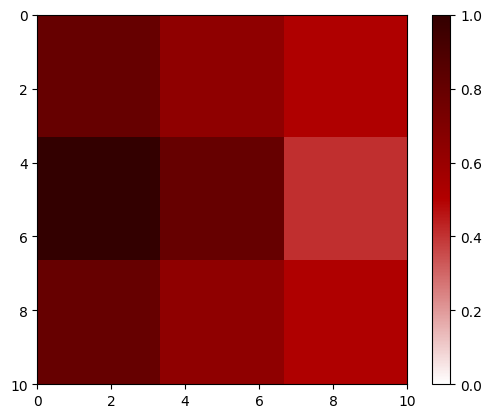

In [47]:
draw(G, type='heatmap')

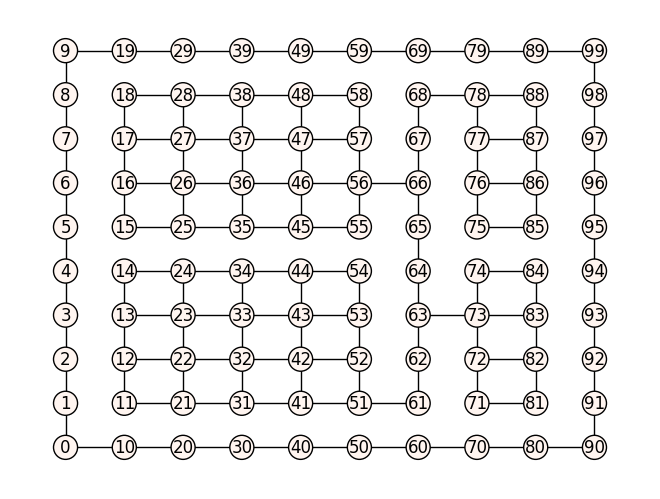

In [48]:
def load_graph():
    with open('graph.pkl', 'rb') as f:
        G = pickle.load(f)

    return G

G = load_graph()
draw(G)

0.8


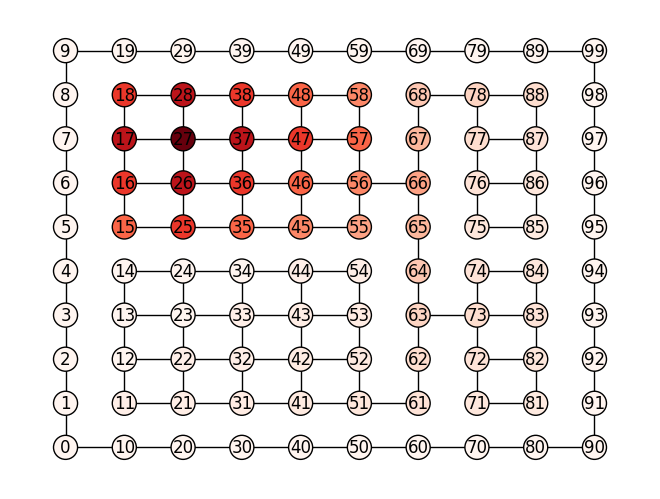

KeyboardInterrupt: 

In [49]:
G.nodes[27]['is_source'] = True
G.nodes[27]['signal'] = 1.0

G = simulate(G)